<a href="https://colab.research.google.com/github/jsb616/AIStudy25/blob/master/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

럭키백에는 생선이 들어있는데 종류가 7가지로 랜덤하게 들어있다.

럭키백에 확률을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함

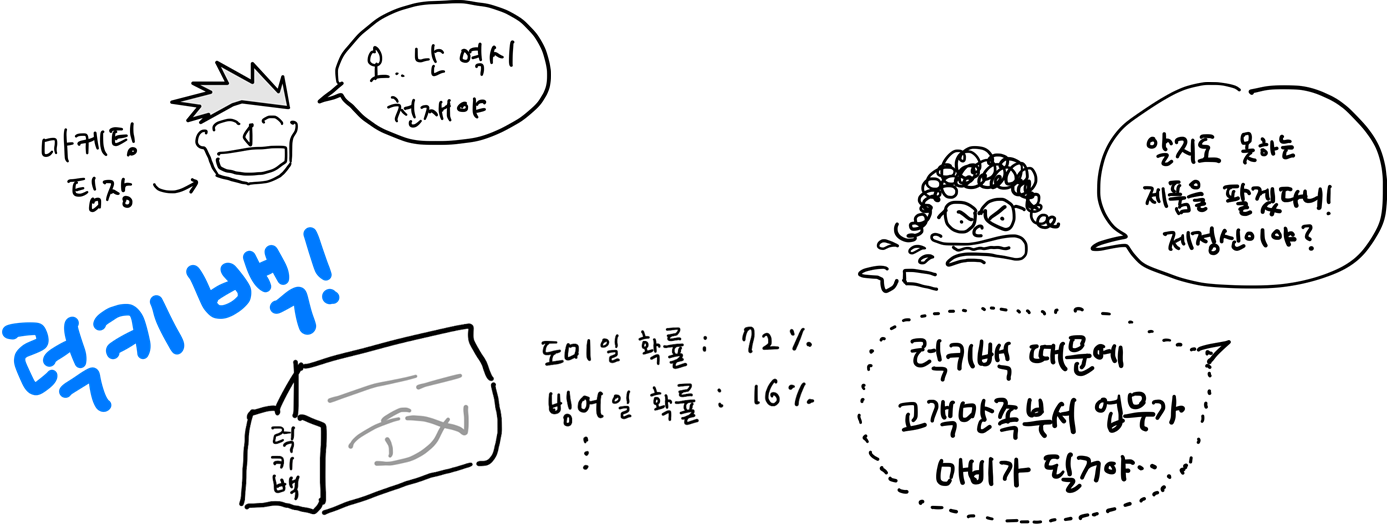

럭키백의 확률 : 생선이 7마리라고 가정함

생선의 크기, 무게 (길이, 높이, 두께, 대각선의길이, 무게)

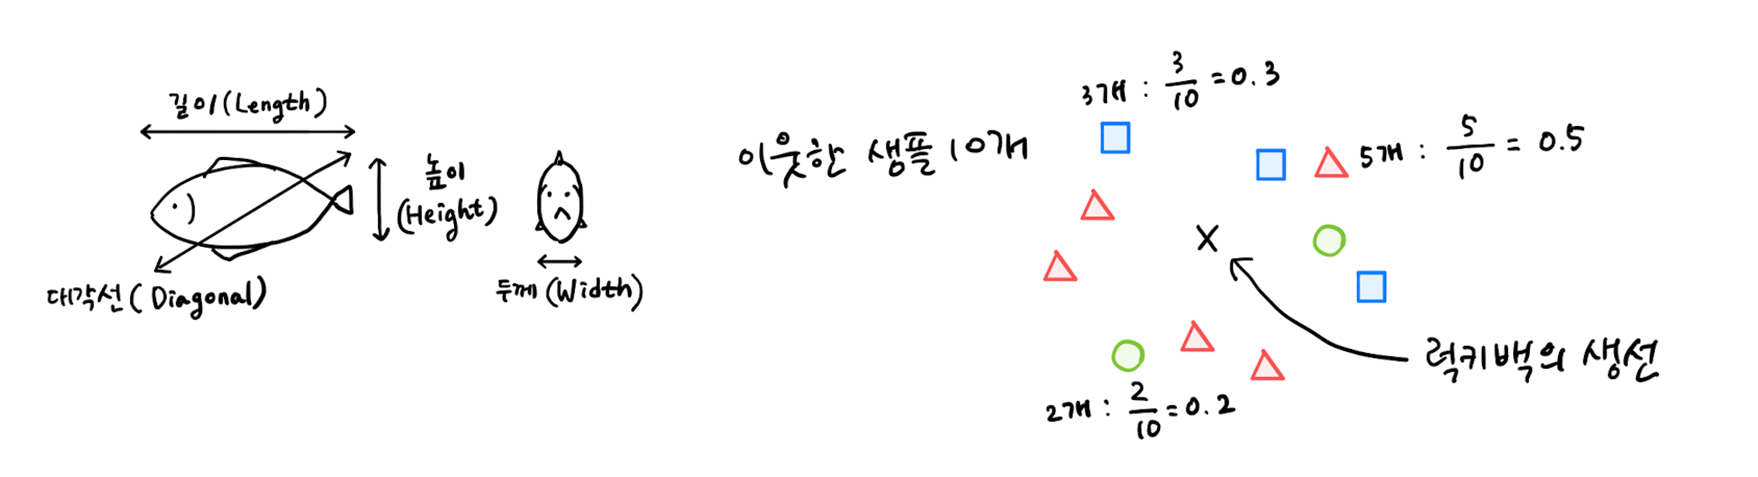

k-최근접 알고리즘을 이용해보면 회귀? 분류?

확률을 알고 싶은 것이기 때문에 회귀를 사용해보자!

샘플 10개 중에 농어가 3개면? 3 / 10 = 0.3

빙어가 5개면? 5 / 10 = 0.5

도미가 2개면? 2 / 10 = 0.2

사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌

In [1]:
# 샘플 데이터 준비
# 로지스틱 회귀 : 럭키백 확률
import pandas as pd     # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data')  # 웹에 있는 파일을 가져옴
fish.head()     # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈), 뭭, 길이, 대각선, 키(높이), 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))   # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


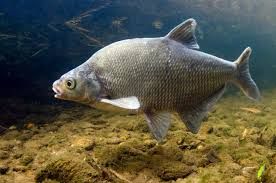
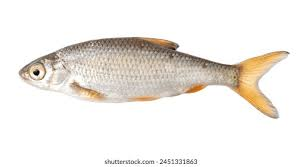
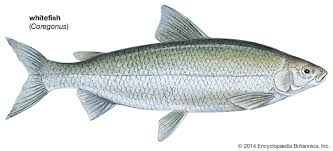
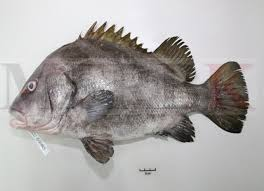
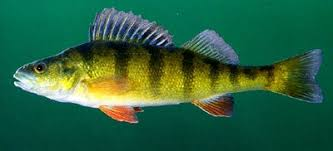
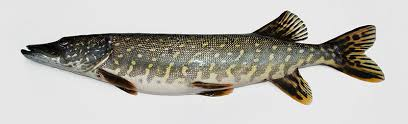
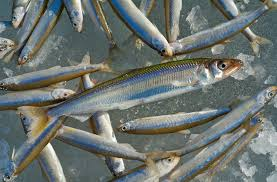

Bream : 브림(도미)

Roach : 로치(대구)

Whitefish : 잉어

Parkki : 붕어

Perch : 농어

Pike : 감물치

Smelt : 빙어

7개의 종류의 어종이 분포되어 있음

In [3]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])   # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()    # fish[['Species']] 이렇게 하면 2차원 배열됨 (금지)
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


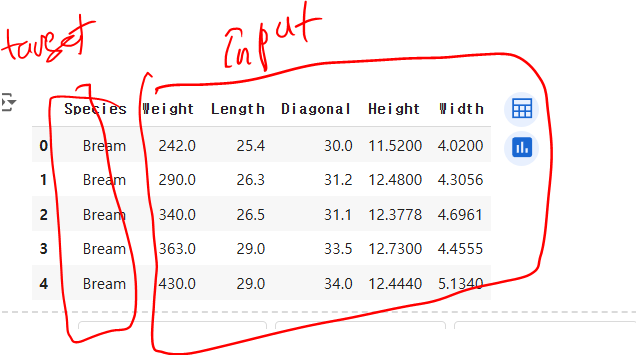

In [5]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
# 훈련용 119개의 5개의 특성
# 테스트용 40개의 5개의 특성

(119, 5) (40, 5)


In [6]:
from sklearn.preprocessing import StandardScaler

# 표준점수는 데이터의 범위(스케일 조정) = (값 - 평균) / 표준편차
ss = StandardScaler()   # 사이킷런의 전처리용(스케일 조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [7]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier  # 분류용

kn = KNeighborsClassifier(n_neighbors=3)    # 이웃 3개 참고
kn.fit(train_scaled, train_target)      # 훈련 시작

print(kn.score(train_scaled, train_target))     # 훈련점수 : 89.07%
print(kn.score(test_scaled, test_target))       # 테스트점수 : 85%

0.8907563025210085
0.85


In [8]:
# 전에는 0과 1을 찾는 이진분류였지만 지금 타깃에 7개의 어종을 넣었음
print(kn.classes_)      # 클래스의 순서가 인덱스로 되어 있으며 이것이 오름차순 형태로 보임
# 7개의 생선 종류가 들어있다.
# 2개 이상 클래스가 포함된 문제를 다중 분류라고 함

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
print(kn.predict(test_scaled[:5]))      # 0~4번 인덱스까지 보자
# 처음 5개 샘플을 타깃값 예측해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
print(test_scaled[:5])  # 전처리 과정에서 표준점수로 변환되어 보임

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [11]:
print(test_target[:5])  # 실제로 맞게 예측했는지 확인

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [12]:
import numpy as np      # 특성에 대한 확률을 보기 위해서 변환

proba = kn.predict_proba(test_scaled[:5])
# 사이킷런이 번거러운 연산을 수행해주므로 쉽게 결과가 나옴
print(np.round(proba, decimals=4))      # 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch Pike Roach Smelt Whitefish 이순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


        ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

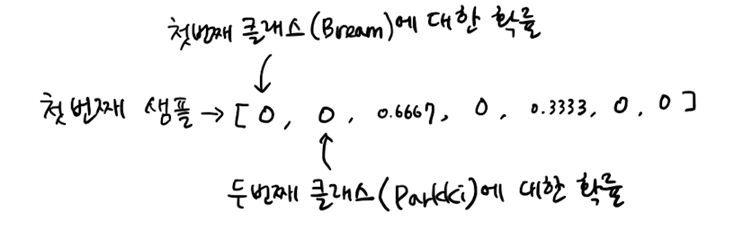

In [13]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])
#                                              4번째 값을 자세히 보자
print(train_target[indexes])
#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확률로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

[['Roach' 'Perch' 'Perch']]


kneighbors는 더미데이터보다 더 높은 값이 들어올 때 문제가 생긴다.

알고리즘 변경해보자 : 로지스틱 회귀(LogisticRegression)

로지스틱 회귀는 사이킷런에서 제공함 from sklearn.linear_model import LogisticRegression

로지스틱 회귀는 이름이 회귀이지만 분류 모델임

선형회귀와 동일하게 선형방정식을 학습한다.

z = a \* (Weight) + b \* (Length) + c \* (Diagonal) + d \* (Height) + e \* (Width) + f

a, b, c, d, e, f는 각 항목에 대한 가중치(중요도, 계수)임

z는 어떤 값도 가능함. 하지만 확률이 되려면 0 ~ 1 (0 ~ 100%) 사이값

z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수

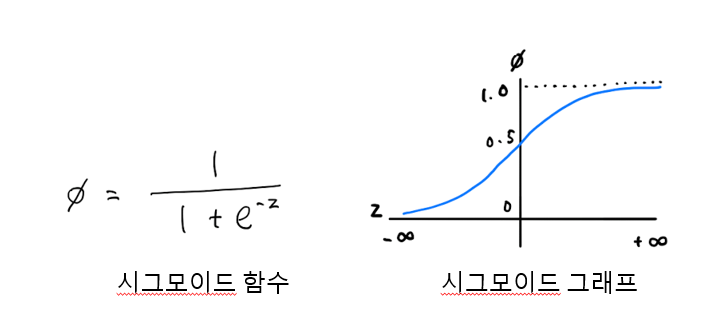

시그모이드 함수 암기!!!

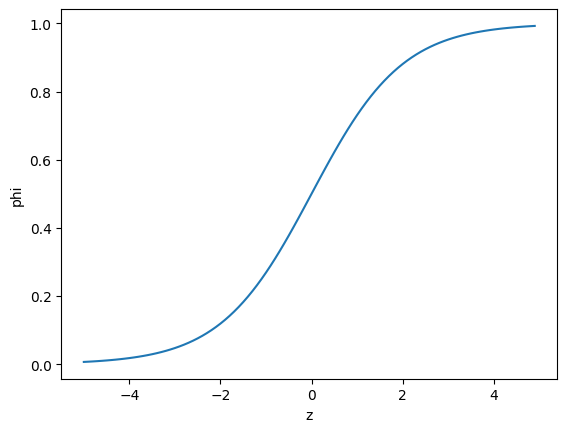

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수일 경우 0에 가까워짐
# z가 무한한게 큰 양수일 경우 1에 가까워짐
z = np.arange(-5, 5, 0.1)   # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z))  # np.exp() 함수로 시그모이드 적용

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

선형방정식의 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함

이렇게 하면 0 ~ 1 사이값을 0 ~ 100% 확률로 해석할 수 있다.

훈련 전에 2진분류부터 알아보자.

2진분류인 경우에는 시그모이드 함수 출력 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단

단, 0.5가 나오면 라이브러리마다 좀 다른데 사이킷런은 음성으로 판단

# 2진 분류

In [15]:
# 로지스틱 회귀로 이진분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])  # 불리언 인덱싱
# 결과 : True값만 출력

['A' 'C']


In [16]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                   Bream(도미) or Smelt(빙어)

# bream_smelt_indexes에 도미와 빙어일 경우 True이고 나머지는 False가 들어있다.
# 이 비열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
print(train_bream_smelt)    # 도미이거나 빙어의 특성리스트

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [17]:
print(target_bream_smelt)   # 도미이거나 빙어의 정답리스트

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [18]:
# 사이킷런에 선형모델에 로지스틱 회귀 클래스를 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()    # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)   # 훈련시작! -> 2진분류로 나옴
# 0.5 이하면 False, 0.5 초과면 True

LogisticRegression()

In [19]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자
print(lr.predict(train_bream_smelt[:5]))    # 도미 4개, 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [20]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 확률 확인(predict_proba)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


샘플마다 2개의 확률이 출력된다. (시그모이드 함수)

첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률임

사이킷런의 타깃값은 알파벳 순으로 정렬해서 사용함

In [21]:
print(lr.classes_)  # Smelt(빙어)가 양성으로 사용됨

['Bream' 'Smelt']


두번째 샘플만 양성 클래스인 빙어의 확률이 높다. (나머지는 도미로 예측함)

만약 도미(Bream)를 양성 클래스로 사용하고 싶으면, 전에 전처리에서 Bream인 타깃값을 1로 만들어야 함

In [22]:
# 로지스틱 회귀로 학습한 계수(중요도)를 봐보자.
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]

선형 방정식에 대입해서 결과가 나옴

z = a \* (Weight) + b \* (Length) + c \* (Diagonal) + d \* (Height) + e \* (Width) + f

z = -0.40451732 \* (Weight) - 0.57582787 \* (Length) - 0.66248158 \* (Diagonal) - 1.01329614 \* (Height) - 0.73123131 \* (Width) - 2.16172774
로 가중치가 결정됨

In [23]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자.
print(decisions)    # 시그모이드하기 전의 값 / 각 특성을 계산한 z 결과값

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [24]:
# 이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit

print(expit(decisions))     # phi = 1 / (1 + np.exp(-z))

# 여기까지가 2개의 물고기 분류하는 방법임

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


```
도미        빙어       도미       도미       도미
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]
```

---

다른 어종으로 2진분류를 해보자!

In [25]:
# Whitefish(잉어)와 Parkki(붕어) 데이터만 추출
whitefish_parkki_indexes = (train_target == 'Whitefish') | (train_target == 'Parkki')

input_whitefish_parkki = train_scaled[whitefish_parkki_indexes]
target_whitefish_parkki = train_target[whitefish_parkki_indexes]

print(input_whitefish_parkki)   # 훈련 입력 데이터

[[-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]
 [-0.54401367 -0.51509149 -0.4750944   0.36630347 -0.47832973]
 [-0.62845626 -0.73062511 -0.70092664  0.13175126 -0.63267554]
 [-0.7691939  -0.88993257 -0.86595789 -0.1161362  -0.93277209]
 [-0.95215284 -1.29288673 -1.28287895 -0.49759839 -1.29339999]
 [-0.93807908 -1.21791852 -1.20470625 -0.56434872 -1.30089783]
 [-0.33853671 -0.32767095 -0.28400558  0.54958905 -0.18548719]
 [ 1.14483805  0.74062612  0.72355366  0.71583516  1.29554992]
 [-0.85363649 -1.01175592 -0.99624572 -0.35987491 -1.0821803 ]
 [ 0.4130023   0.23459067  0.23714575  0.46463858  1.28847878]
 [-0.24564987 -0.04654014 -0.04080162 -0.02086325  0.14222336]
 [-0.26253839 -0.23396068 -0.19714702  0.61873479 -0.13062493]]


In [26]:
print(target_whitefish_parkki)  # 훈련 정답 데이터

['Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Whitefish' 'Parkki' 'Whitefish' 'Whitefish' 'Parkki']


In [27]:
# 로지스틱 회귀
lr = LogisticRegression()
lr.fit(input_whitefish_parkki, target_whitefish_parkki)

print(lr.predict(input_whitefish_parkki[-5:]))

['Whitefish' 'Parkki' 'Whitefish' 'Parkki' 'Parkki']


In [28]:
print(lr.predict_proba(input_whitefish_parkki[-5:]))

[[0.10365741 0.89634259]
 [0.95624984 0.04375016]
 [0.230143   0.769857  ]
 [0.62394728 0.37605272]
 [0.7415768  0.2584232 ]]


In [29]:
print(lr.classes_)

['Parkki' 'Whitefish']


In [30]:
print(lr.coef_, lr.intercept_)

[[ 0.53314494  0.60224359  0.57175646 -0.11962849  0.95313471]] [-0.46206632]


z = 0.53314494 \* (Weight) + 0.60224359 \* (Length) + 0.57175646 \* (Diagonal) - 0.11962849 \* (Height) + 0.95313471 \* (Width) - 0.46206632

In [31]:
decisions = lr.decision_function(input_whitefish_parkki[-5:])   # 끝의 5개의 z 값
print(decisions)

[ 2.15723141 -3.08452404  1.20750394 -0.50633654 -1.0541802 ]


In [32]:
# z값을 시그모이드 함수에 적용
from scipy.special import expit

print(expit(decisions))

[0.89634259 0.04375016 0.769857   0.37605272 0.2584232 ]


# 다중 분류

다중분류로 진행해보기 (2진분류는 True 아니면 모두 False 처리됨)

현재 어종이 7개이므로 로지스틱 회귀로 분류를 학습함

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)

max_iter=100 반복횟수를 100으로 하면 부족하다는 경고 문구가 나와 1000으로 향상

LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)

릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절하였음 -> alpha가 크면 규제도 커짐

LogisticRegression 규제를 제어하는 매개변수가 C로 되어 있음 -> C가 작으면 규제가 커짐(기본1)

규제를 완화하기 위해서 20으로 늘리겠다.

In [33]:
lr = LogisticRegression(C=20, max_iter=1000)    # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))     # 93.27%
print(lr.score(test_scaled, test_target))       # 92.5% 과소나 과대적합이 아닌 듯함

0.9327731092436975
0.925


In [37]:
print(lr.predict(test_scaled[:5]))     # 0~4번 인덱스 결과(분석시 다중 분류로 나옴)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [35]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
# 'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [38]:
# 다중 분류일 때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함. 7행을 가짐
# (7,) 7개의 행 -> 이진 분류에서 보았던 z를 7개 계산함
# 다중 분류는 클래스마다 z 값을 하나씩 계산한다는 의미다.
# 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨

(7, 5) (7,)


In [40]:
print(lr.coef_)
print()
print(lr.intercept_)

[[-1.50605456 -1.03747913  2.60919713  7.69422741 -1.18603342]
 [ 0.19200046 -1.99988812 -3.79617724  6.5031264  -2.00022753]
 [ 3.55793539  6.36988929 -8.52233733 -5.75397233  3.79233437]
 [-0.11453309  3.61060122  3.94464503 -3.62243904 -1.75981679]
 [-1.40843718 -6.09242191  5.28629634 -0.8669657   1.84518456]
 [-1.33419947  1.48153392  1.38217547 -5.6602348  -4.39228965]
 [ 0.61328845 -2.33223525 -0.90379939  1.70625807  3.70084846]]

[-0.10345047 -0.27281218  3.24444853 -0.17565069  2.64960025 -6.72042849
  1.37829306]


다중 분류 끝

---

그럼 확률은? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환했었다.

그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

소프트맥스 계산법

e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7

s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum -> s1~s7 까지 모두 더하면 분모가 같아져 1이 됨

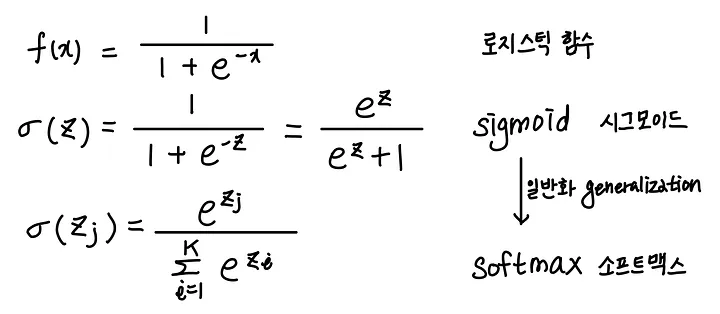

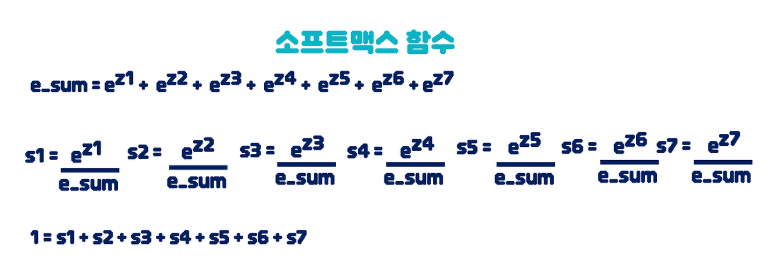

In [41]:
# 0~4번 인덱스의 테스트 리스트에서 결과 출력
decision = lr.decision_function(test_scaled[:5])
print('5개 샘플에 대한 z1~z7의 값\n')
for idx, z in enumerate(decision):  # 선형방정식을 이용한 7개의 특성의 값
    print(f'{idx}번째 샘플의 z값\n{z}\n')

5개 샘플에 대한 z1~z7의 값

0번째 샘플의 z값
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [43]:
decision

array([[ -6.50722814,   1.03902666,   5.16819138,  -2.75730346,
          3.33655201,   0.34625859,  -0.62549704],
       [-10.87900747,   1.94410609,   4.77600607,  -2.42306183,
          2.98748716,   7.84171377,  -4.24724379],
       [ -4.33809959,  -6.23690282,   3.16746648,   6.48091391,
          2.36412675,   2.43431898,  -3.87182371],
       [ -0.69143994,   0.44628533,   2.64291146,  -1.21457286,
          3.2612452 ,  -5.70143404,   1.25700485],
       [ -6.40138612,  -1.99137623,   5.81526372,  -0.134644  ,
          3.49905134,  -0.08753485,  -0.69937385]])

In [42]:
from scipy.special import softmax       # 소프트맥스를 사용하여 7개를 100%로 분류
print('소프트맥스 함수로 예측 확률 구하기\n')
class_ = lr.classes_.tolist() + ['예측 결과']
prd = lr.predict(test_scaled[:5]).reshape(5, -1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm, prd))
print(pd.DataFrame(con, columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
